<a href="https://colab.research.google.com/github/Khonotshwete/FinalCodeML/blob/main/Final_Assignment_ml_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn

# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
import pandas as pd

# dataset loaded
df = pd.read_csv('traffic_accidents.csv')

# display of first few rows
df.head()


,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [ ]:
print(df.columns)

Index(['crash_date', 'traffic_control_device', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'damage', 'prim_contributory_cause',
       'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour',
       'crash_day_of_week', 'crash_month'],
      dtype='object')


In [ ]:
# Check dataset structure
df.info()

# Check for missing values
print("Missing Values Before Processing:\n", df.isnull().sum())

# Handle missing numerical values (replace with median)
df.fillna(df.median(numeric_only=True), inplace=True)

# Handle missing categorical values
for col in df.select_dtypes(include=['object']).columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].dropna().mode()[0], inplace=True)

# Verify missing values are removed
print("Missing Values After Processing:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [ ]:
# -------------------- Missing Values Handling --------------------
# Drop columns with more than 40% missing values
threshold = 0.4
df = df.loc[:, df.isnull().mean() < threshold]

# Sophisticated imputation (for numerical features)
numeric_columns = df.select_dtypes(include=['number']).columns
knn_imputer = KNNImputer(n_neighbors=5)
df[numeric_columns] = knn_imputer.fit_transform(df[numeric_columns])

# For categorical columns, you could use SimpleImputer
categorical_columns = df.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])

print("Missing Values After Handling:\n", df.isnull().sum())

Missing Values After Handling:
 crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
day_of_week                      0
is_weekend                       0
dtype: int64


In [ ]:
# Convert categorical columns into numerical format
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store for decoding later if needed

# Verify encoding was applied
print("Dataset After Encoding:\n", df.head())


Dataset After Encoding:
    crash_date  traffic_control_device  weather_condition  lighting_condition  \
0      102748                      16                  2                   3   
1      110797                      16                  2                   1   
2      176858                      16                  2                   3   
3      108613                      16                  2                   3   
4      113911                      16                  2                   3   

   first_crash_type  trafficway_type  alignment  roadway_surface_cond  \
0                17                8          3                     5   
1                17                6          3                     0   
2                10               15          3                     0   
3                 0                6          3                     0   
4                10               15          3                     5   

   road_defect  crash_type  ...  most_severe_injury  in

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Identify numerical features for scaling
num_features = ['crash_hour', 'injuries_total', 'num_units']

# Apply MinMax Scaling
scaler = MinMaxScaler()
df[num_features] = scaler.fit_transform(df[num_features])

# Verify scaling effect
print("Dataset After Scaling:\n", df[num_features].describe())


Dataset After Scaling:
           crash_hour  injuries_total      num_units
count  209306.000000   209306.000000  209306.000000
mean        0.581437        0.018225       0.106330
std         0.243645        0.038082       0.039601
min         0.000000        0.000000       0.000000
25%         0.391304        0.000000       0.100000
50%         0.608696        0.000000       0.100000
75%         0.739130        0.047619       0.100000
max         1.000000        1.000000       1.000000


In [ ]:
# Define features (X) and target variable (y)
X = df.drop(columns=['crash_type'])  # Ensure 'crash_type' is correct
y = df['crash_type']

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of datasets
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")


Training Set: (167444, 23), Testing Set: (41862, 23)


In [ ]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("✅ Model Training Complete!")


✅ Model Training Complete!


In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f' Model Accuracy: {accuracy:.2f}')


 Model Accuracy: 0.84


In [ ]:
# Display classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))



🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.75      0.80     18512
           1       0.82      0.91      0.86     23350

    accuracy                           0.84     41862
   macro avg       0.84      0.83      0.83     41862
weighted avg       0.84      0.84      0.84     41862



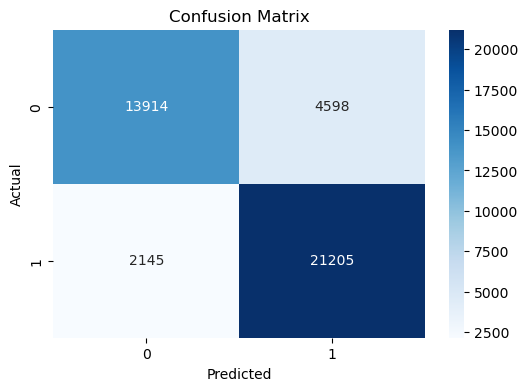

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


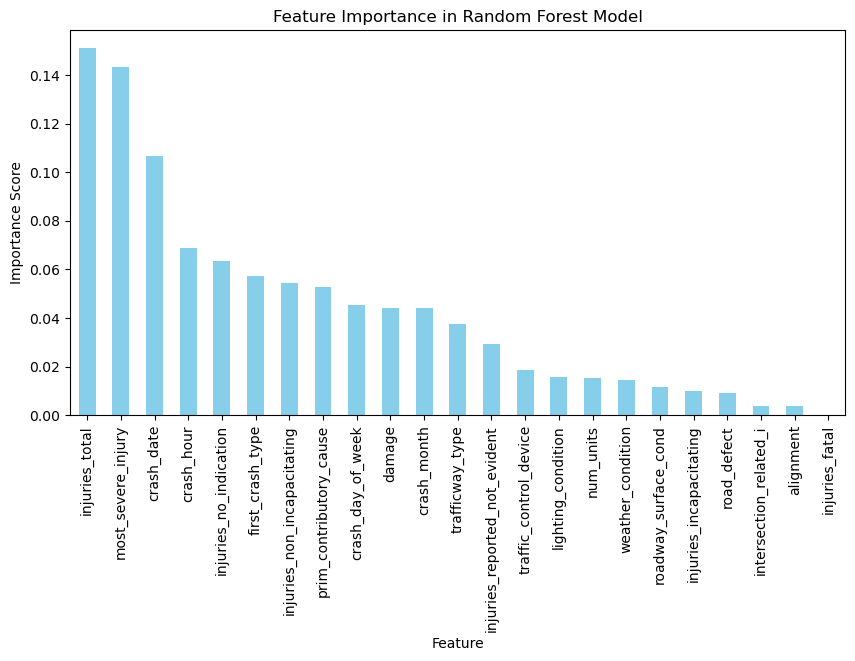

In [ ]:
# Extract feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)

# Sort and plot feature importance
plt.figure(figsize=(10,5))
feature_importance.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance in Random Forest Model')
plt.show()


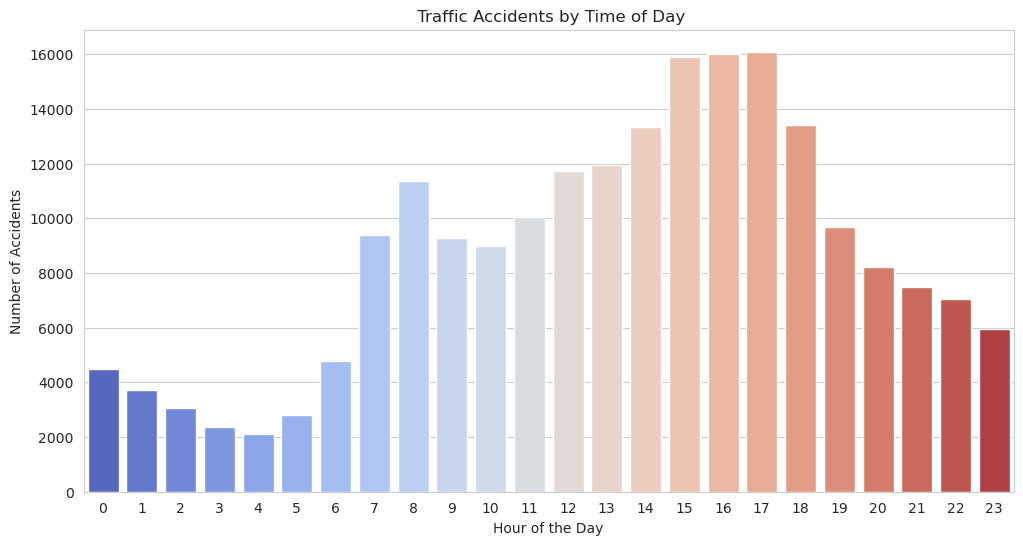

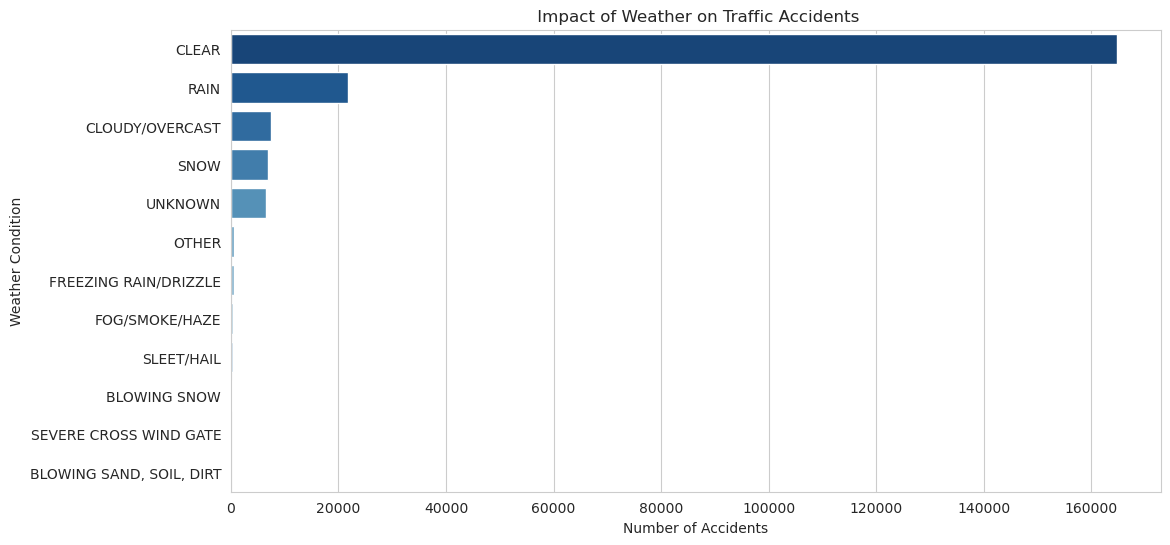

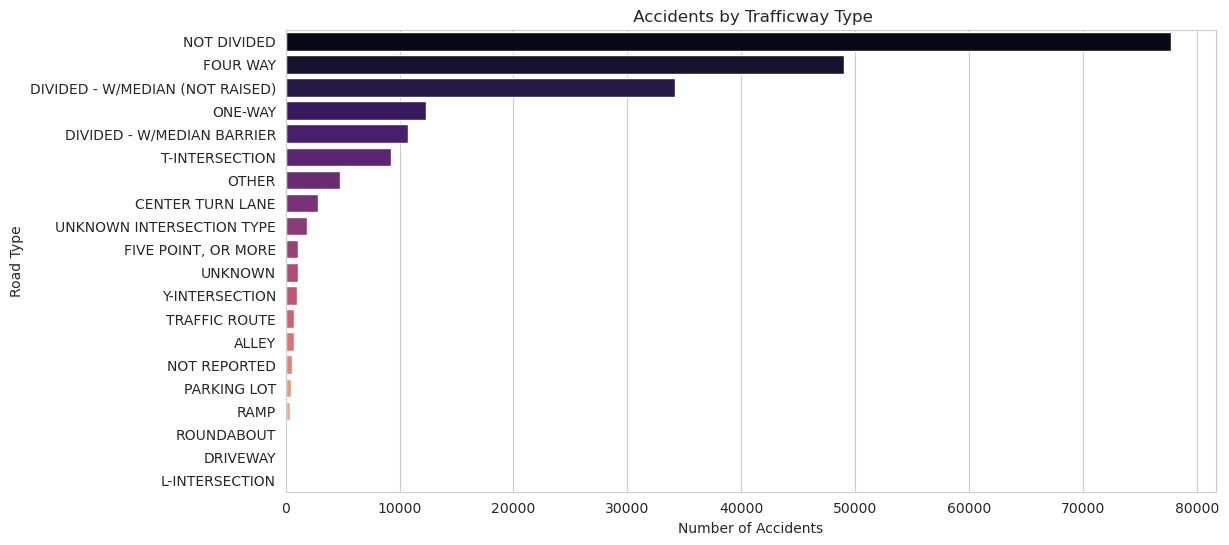

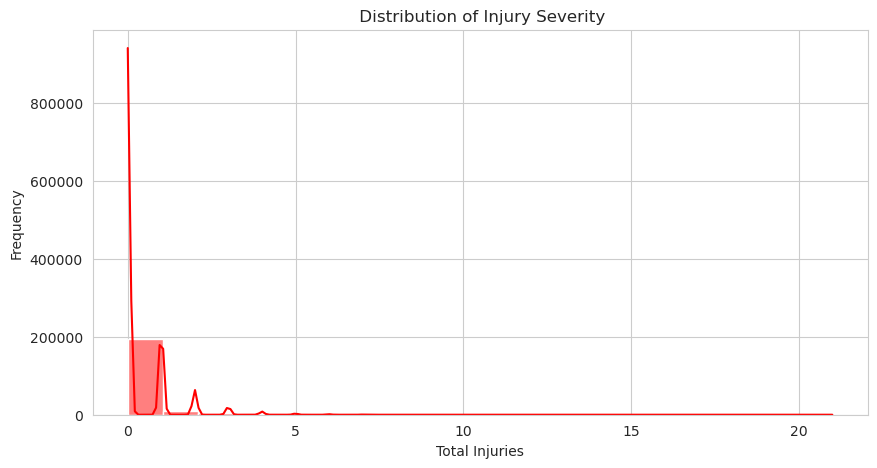

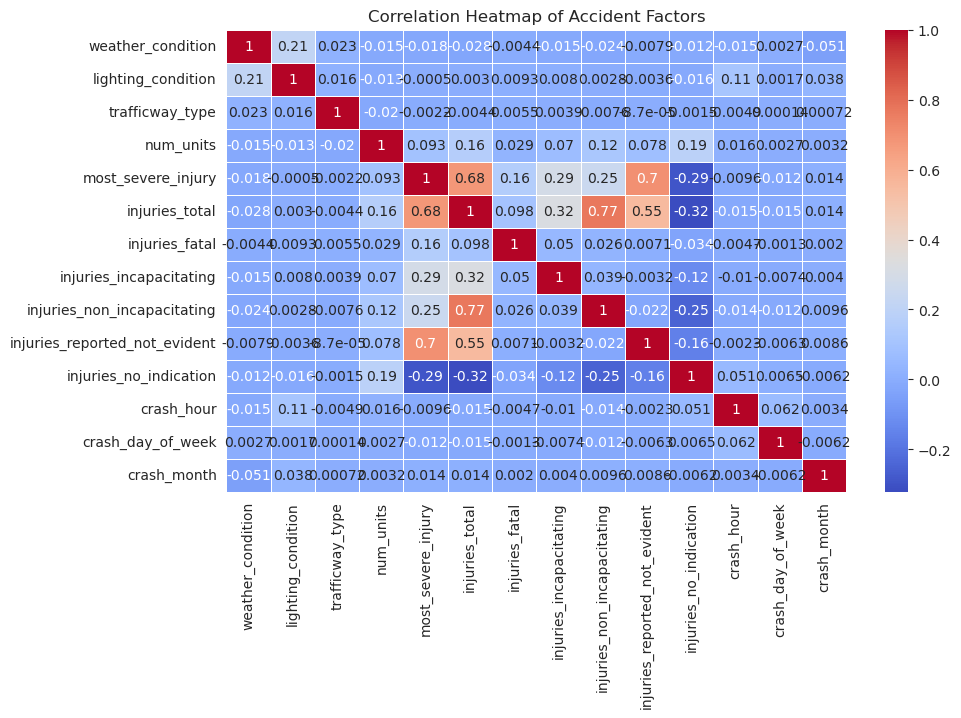

In [ ]:
# Create a new column for the hour of the crash
df["crash_hour"] = df["crash_date"].dt.hour

# Set figure style
sns.set_style("whitegrid")

# --------------------  1. Bar Chart: Accidents by Time of Day --------------------
plt.figure(figsize=(12, 6))
sns.countplot(x=df["crash_hour"], palette="coolwarm")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.title(" Traffic Accidents by Time of Day")
plt.xticks(range(0, 24))
plt.show()

# --------------------  2. Bar Chart: Accidents by Weather Condition --------------------
plt.figure(figsize=(12, 6))
sns.countplot(y=df["weather_condition"], order=df["weather_condition"].value_counts().index, palette="Blues_r")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.title(" Impact of Weather on Traffic Accidents")
plt.show()

# -------------------- ️ 3. Bar Chart: Accidents by Road Type --------------------
plt.figure(figsize=(12, 6))
sns.countplot(y=df["trafficway_type"], order=df["trafficway_type"].value_counts().index, palette="magma")
plt.xlabel("Number of Accidents")
plt.ylabel("Road Type")
plt.title(" Accidents by Trafficway Type")
plt.show()

# --------------------  4. Histogram: Distribution of Injury Severity --------------------
plt.figure(figsize=(10, 5))
sns.histplot(df["injuries_total"], bins=20, kde=True, color="red")
plt.xlabel("Total Injuries")
plt.ylabel("Frequency")
plt.title(" Distribution of Injury Severity")
plt.show()

# --------------------  5. Heatmap: Correlation Between Accident Factors --------------------
# Convert categorical variables to numeric for correlation analysis
df_encoded = df.copy()
categorical_columns = ["weather_condition", "lighting_condition", "trafficway_type", "most_severe_injury"]
df_encoded[categorical_columns] = df_encoded[categorical_columns].apply(lambda x: pd.factorize(x)[0])

# Select only numeric columns for correlation
numeric_columns = df_encoded.select_dtypes(include=['number']).columns
correlation_matrix = df_encoded[numeric_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Accident Factors")
plt.show()

In [ ]:
# Load the dataset
df = pd.read_csv("traffic_accidents.csv")

# Convert categorical variables to numerical
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use

# Define features (X) and target variable (y)
X = df.drop(columns=['crash_type'])  # Adjust if necessary
y = df['crash_type']

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply MinMax Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Data Preprocessing Complete!")


✅ Data Preprocessing Complete!


🔹 Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.94      0.66      0.78     18512
           1       0.78      0.96      0.86     23350

    accuracy                           0.83     41862
   macro avg       0.86      0.81      0.82     41862
weighted avg       0.85      0.83      0.83     41862



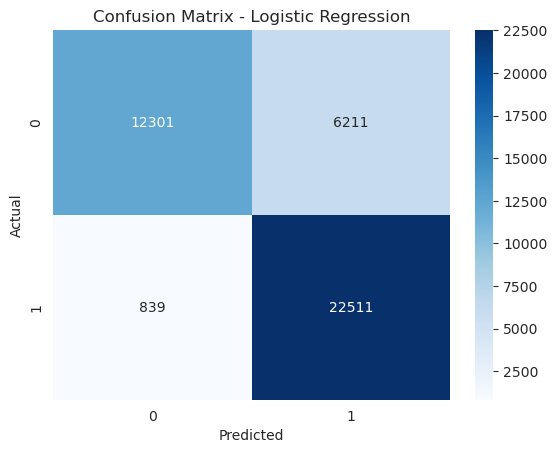

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression with more iterations and a different solver
log_model = LogisticRegression(max_iter=500, solver='saga')  # saga is better for large datasets
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)

# Evaluation
print("🔹 Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


🔹 Random Forest Results:
              precision    recall  f1-score   support

           0       0.87      0.75      0.81     18512
           1       0.82      0.91      0.86     23350

    accuracy                           0.84     41862
   macro avg       0.84      0.83      0.83     41862
weighted avg       0.84      0.84      0.84     41862



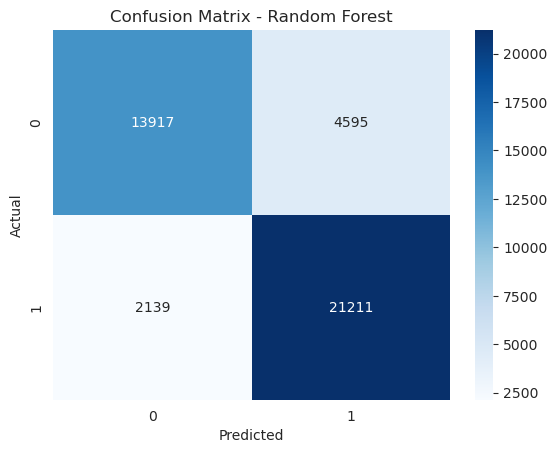

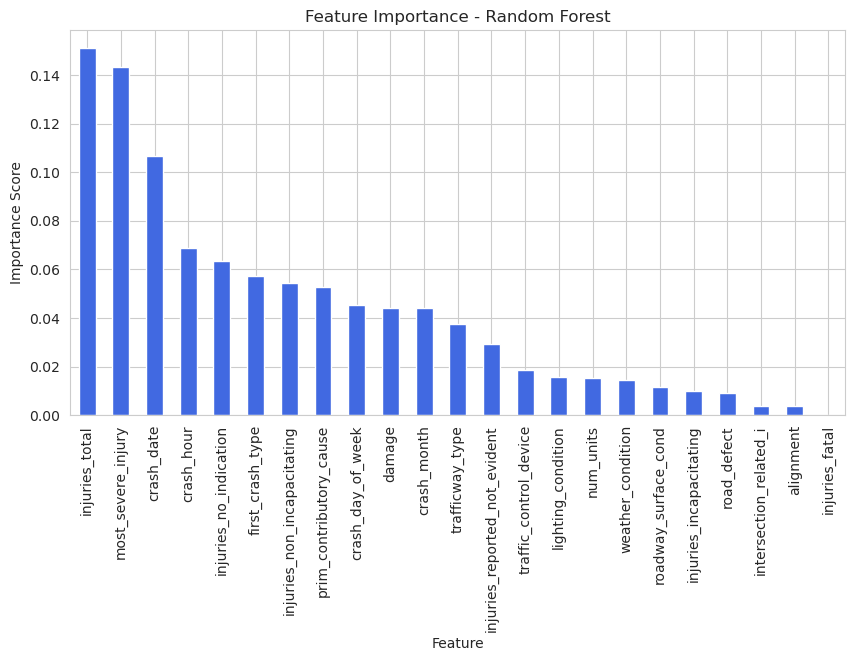

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("🔹 Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Feature Importance Analysis
feature_importance = pd.Series(rf_model.feature_importances_, index=df.drop(columns=['crash_type']).columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='royalblue')
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance - Random Forest")
plt.show()
